In [15]:
!pip install numpy matplotlib scipy pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 10.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 10.7 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 13.1 MB/s eta 0:00:00


In [2]:
import matplotlib.pyplot as plt;
import numpy as np;
from scipy.interpolate import UnivariateSpline
import pandas as pd
import glob
import os
from values import *

In [5]:
df = pd.read_csv("/media/ashwin/Storage/Downloads/h/additional codes/lightcone/z_xHI_7.7055", sep=" ", header=None, 
                 names=["z","xHI"])
 

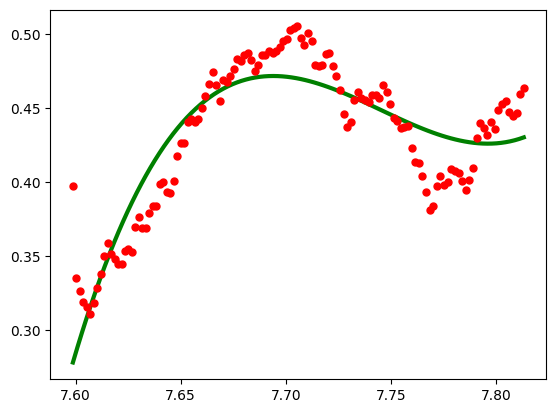

In [6]:
z=df["z"]
xH=df["xHI"]

spl = UnivariateSpline(z,xH,k=3)
xs = np.linspace(min(z), max(z), 100)
plt.plot(xs, spl(xs), 'g', lw=3)
plt.plot(z, xH, 'ro', ms=5)

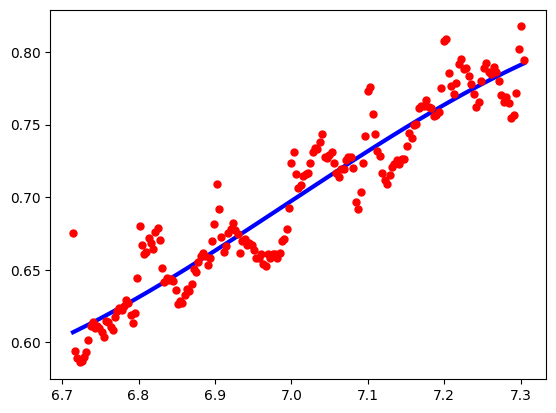

In [101]:
spl.set_smoothing_factor(0.1)
plt.plot(xs, spl(xs), 'b', lw=3)
plt.plot(z, xH, 'ro', ms=5)

In [5]:
location_home=os.getcwd()

In [6]:
os.chdir(location_home)
os.chdir("../Save/Run")



In [29]:
files = np.array(glob.glob("nion/*/lightcone/z_xHI.txt",recursive=True))
print(files)

['nion/30/lightcone/z_xHI.txt' 'nion/15/lightcone/z_xHI.txt'
 'nion/20/lightcone/z_xHI.txt' 'nion/25/lightcone/z_xHI.txt']


In [30]:
# Extract folder names from file paths
nion = np.array( [os.path.basename(os.path.dirname(os.path.dirname(file))) for file in files],float )

sorted_indices = np.argsort(nion)
# Sort the first array and rearrange the elements of the second array accordingly
nion = nion[sorted_indices]
print(nion)
print(sorted_indices)
files = files[sorted_indices]

print(nion)
print(files)



[15. 20. 25. 30.]
[1 2 3 0]
[15. 20. 25. 30.]
['nion/15/lightcone/z_xHI.txt' 'nion/20/lightcone/z_xHI.txt'
 'nion/25/lightcone/z_xHI.txt' 'nion/30/lightcone/z_xHI.txt']


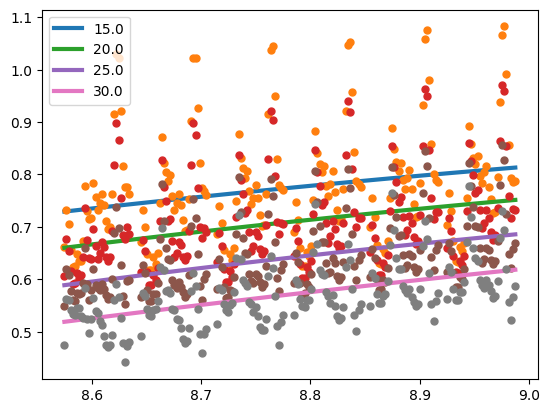

In [31]:
for i in range(len(nion)):
    df = pd.read_csv(files[i], sep="\t", header=None, 
                 names=["z", "xHI"])
    z=np.array(df["z"],float)
    xH=np.array(df["xHI"],float)

    spl = UnivariateSpline(z,xH,k=2)
    xs = np.linspace(min(z), max(z), 100)
    plt.plot(xs, spl(xs), lw=3, label=nion[i] )
    plt.plot(z, xH, 'o', ms=5)
    plt.legend()
plt.show()

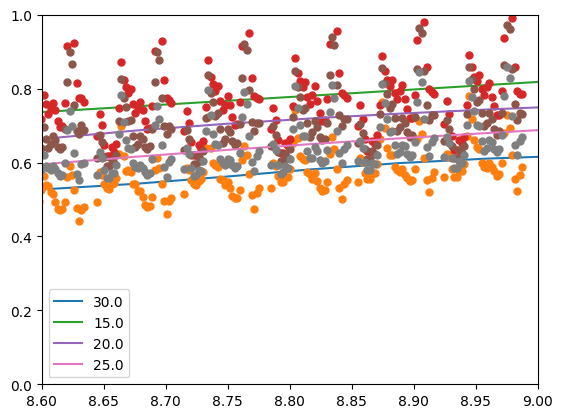

In [24]:
for i in range(len(nion)):
    df = pd.read_csv(files[i], sep="\t", header=None, 
                 names=["z", "xHI"])
    z=np.array(df["z"],float)
    xH=np.array(df["xHI"],float)
    xdata=z
    ydata=xH

        # Estimating initial parameter values
    p0 = [1, 1]
    p0.append(0.5*(max(xdata)+min(xdata)))
    p0.append(0.5*(max(ydata)+min(ydata)))
    # Fitting data
    output = curve_fit(f, xdata, ydata, p0=p0, full_output=True,maxfev = 5000)
    # Extracting relevant information from output
    copt = output[0]
    res = output[2]['fvec']
    numeval = output[2]['nfev']
    msg = output[3]

    # Plotting data and fitted function
    xi = np.linspace(5, 12, 100)
    yi = f(xi, *copt)

    plt.plot(xi,yi,label=nion[i])
    plt.ylim([0,1])
    plt.xlim([8.6,9])

    plt.plot(z, xH, 'o', ms=5)
    plt.legend()
plt.show()

In [ ]:
import yt
import numpy as np

In [119]:


N = 128

data = {"density": np.random.random((N, N, N))}

cell_widths = []
for i in range(3):
    widths = np.random.random(N)
    widths /= widths.sum()  # Normalize to span 0 .. 1.
    cell_widths.append(widths)

ds = yt.load_uniform_grid(
    data,
    [N, N, N],
    bbox=np.array([[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]),
    cell_widths=cell_widths,
)

yt : [INFO     ] 2024-04-01 00:28:11,114 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-04-01 00:28:11,115 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-04-01 00:28:11,115 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-04-01 00:28:11,116 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-04-01 00:28:11,116 Parameters: cosmological_simulation   = 0


In [120]:
sc = yt.create_scene(ds, lens_type="perspective")
source = sc[0]


yt : [INFO     ] 2024-04-01 00:28:21,759 Setting default field to ('gas', 'density')


In [121]:
sc.save("rendering.png", sigma_clip=6.0)


yt : [WARNING  ] 2024-04-01 00:28:23,204 No previously rendered image found, rendering now.
yt : [INFO     ] 2024-04-01 00:28:23,205 Rendering scene (Can take a while).
yt : [INFO     ] 2024-04-01 00:28:23,207 Creating volume
yt : [INFO     ] 2024-04-01 00:28:23,301 Creating transfer function
yt : [INFO     ] 2024-04-01 00:28:23,302 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2024-04-01 00:28:29,640 Saving rendered image to rendering.png


In [122]:
sc.save("rendering.png", sigma_clip=4.0)


yt : [WARNING  ] 2024-04-01 00:29:26,162 Previously rendered image exists, but rendering anyway. Supply 'render=False' to save previously rendered image directly.
yt : [INFO     ] 2024-04-01 00:29:26,163 Rendering scene (Can take a while).
yt : [INFO     ] 2024-04-01 00:29:32,658 Saving rendered image to rendering.png


In [114]:
!pwd

/home/ashwin


In [113]:
os.chdir("..")


In [126]:
np.random.random((N, N, N))

array([[[0.78694605, 0.4836522 , 0.64285732, ..., 0.95412114,
         0.5690626 , 0.92954875],
        [0.28630294, 0.96403294, 0.90348624, ..., 0.01746731,
         0.45592282, 0.70110659],
        [0.46699366, 0.14006658, 0.05890794, ..., 0.63183296,
         0.80300602, 0.20832189],
        ...,
        [0.05589984, 0.5789852 , 0.58912645, ..., 0.19250682,
         0.57817027, 0.32924058],
        [0.47334125, 0.15755846, 0.28349641, ..., 0.86533024,
         0.38753367, 0.8541965 ],
        [0.22800923, 0.07347137, 0.29631252, ..., 0.92218522,
         0.39947332, 0.21528578]],

       [[0.7792077 , 0.94602359, 0.24082523, ..., 0.24628295,
         0.21950488, 0.43004557],
        [0.09940418, 0.21741414, 0.62046616, ..., 0.52564787,
         0.01353862, 0.60022505],
        [0.96073056, 0.78760206, 0.122139  , ..., 0.88703722,
         0.80946062, 0.75785316],
        ...,
        [0.54658401, 0.72661603, 0.12492287, ..., 0.65035108,
         0.23038161, 0.84945515],
        [0.5

In [1]:
import os
import sys
import matplotlib.pyplot as plt


In [37]:

def search_and_plot(directory, search_string):
    # Get a list of all files in the directory
    files = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    
    # Filter files by the provided search string
    files = [f for f in files if search_string in f][::-1]
    
    if not files:
        print("No files found in the directory matching the search string.")
        return
    
    z=[]
    xH=[]
    for file_name in files:
        file_path = os.path.join(directory, file_name)
        # Process each file
        with open(file_path, 'r') as file:
            # Assuming the file contains two columns of data separated by whitespace
            data = [list(map(float, line.strip().split())) for line in file]
            # Extract x and y values
            x_values = [row[0] for row in data]
            y_values = [row[1] for row in data]

            z=z+x_values
            xH=xH+y_values

            # Plot the data
            plt.plot(x_values, y_values, label=file_name)
    # Add legend and labels
  
    plt.xlabel('X-axis label')
    plt.ylabel('Y-axis label')
    plt.title('Data from Files')
    plt.grid(True)

    spl = UnivariateSpline(z,xH,k=2)
    xs = np.linspace(min(z), max(z), 5*len(z))
    plt.plot(xs, spl(xs), 'g', lw=3,label="ssmooth 3")

    # Defining data points
    xdata = z
    ydata = xH 

    # Estimating initial parameter values
    p0 = [1, 1]
    p0.append(0.5*(max(xdata)+min(xdata)))
    p0.append(0.5*(max(ydata)+min(ydata)))
    # Fitting data
    output = curve_fit(f, xdata, ydata, p0=p0, full_output=True)
    # Extracting relevant information from output
    copt = output[0]
    res = output[2]['fvec']
    numeval = output[2]['nfev']
    msg = output[3]

    # Plotting data and fitted function
    xi = np.linspace(min(xdata), max(xdata), 100)
    yi = f(xi, *copt)

    plt.plot(xi,yi,label="Taninvers ")
    plt.legend()
    plt.show()
    return z, xH


In [30]:
directory_path = "/home/ashwin/HPC/Save/Run/lightcone/"  # Directory path provided as command line argument
search_string = "z_xHI"  # Search string provided as command line argument


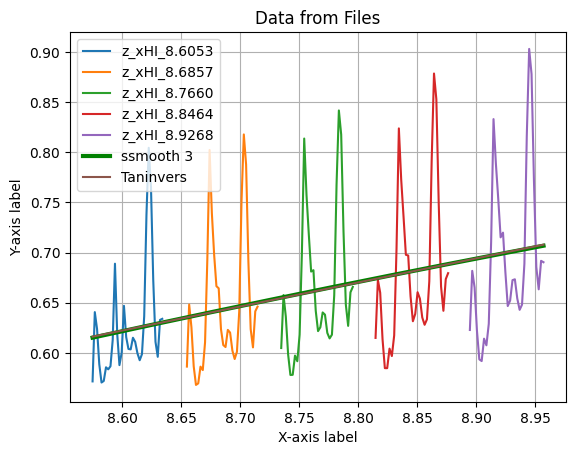

In [38]:
z,xH=search_and_plot(directory_path, search_string)


In [39]:


# Convert lists to NumPy arrays
array1 = np.array(z)
array2 = np.array(xH)

# Stack arrays horizontally
stacked_array = np.column_stack((array1, array2))

# Output file path
output_file = "output.txt"

# Save stacked array to a text file
np.savetxt(output_file, stacked_array, delimiter='\t', fmt='%f')

print("Lists saved into output.txt file with two columns.")


Lists saved into output.txt file with two columns.


In [12]:
# Importing modules and classes
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Defining parametrized arctangent function
def f(x, k, w, x0, y0):
    return k * np.arctan(w*(x-x0)) + y0


ax = make_fig()
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.scatter(xdata, ydata)
ax.plot(xi, yi, linestyle=':')

# Calculating residual sum of squares (RSS)
rss = np.sum(res**2)
# Calculating root mean squared error (RMSE) from RSS
rmse = np.sqrt(rss/len(ydata))
# Calculating R-square
r2 = 1 - rss/np.sum((ydata-np.mean(ydata))**2)
# Displaying fit info
print('Found solution in {:d} function evaluations.'.format(numeval))
print(msg)
print('R-square = {:1.4f}, RMSE = {:1.4f}'.format(r2, rmse))
print('')
print('Coefficients:')
print('  k  = {:1.3f}'.format(copt[0]))
print('  w  = {:1.3f}'.format(copt[1]))
print('  x0 = {:1.3f}'.format(copt[2]))
print('  y0 = {:1.3f}'.format(copt[3]))

NameError: name 'make_fig' is not defined

In [1]:
import numpy as np

# Sample arrays
array1 = np.array([3.2, 1.1, 5.5, 2.3, 4.7])  # First array
array2 = np.array([0.3, 0.1, 0.5, 0.2, 0.4])  # Second array

# Get the indices that would sort the first array
sorted_indices = np.argsort(array1)

# Sort the first array and rearrange the elements of the second array accordingly
sorted_array1 = array1[sorted_indices]
sorted_array2 = array2[sorted_indices]

print("Sorted array 1:", sorted_array1)
print("Corresponding elements in array 2:", sorted_array2)

Sorted array 1: [1.1 2.3 3.2 4.7 5.5]
Corresponding elements in array 2: [0.1 0.2 0.3 0.4 0.5]
